In [120]:
# import important libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)


In [121]:
#read data 
df = pd.read_csv('bank-additional-full.csv',delimiter=";", engine='python',encoding='utf-8',error_bad_lines=False)


Skipping line 7427: unexpected end of data


In [122]:
#show show the data  
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [123]:
df.shape

(7425, 21)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 21 columns):
age               7425 non-null int64
job               7425 non-null object
marital           7425 non-null object
education         7425 non-null object
default           7425 non-null object
housing           7425 non-null object
loan              7425 non-null object
contact           7425 non-null object
month             7425 non-null object
day_of_week       7425 non-null object
duration          7425 non-null int64
campaign          7425 non-null int64
pdays             7425 non-null int64
previous          7425 non-null int64
poutcome          7425 non-null object
emp.var.rate      7425 non-null float64
cons.price.idx    7425 non-null float64
cons.conf.idx     7425 non-null float64
euribor3m         7425 non-null float64
nr.employed       7425 non-null int64
y                 7425 non-null object
dtypes: float64(4), int64(6), object(11)
memory usage: 1.2+ MB


#### No have null date. 
#### duration: last contact duration, in seconds (numeric). Important note:this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.Also, after the end of the call y is obviously known. Thus, this  input should only be included for benchmark purposes and should be discarded if the intentionis to have a realistic predictive model.


In [125]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [126]:
# bank client data:
#df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['default']=df['default'].astype('category')
df['housing']=df['housing'].astype('category')
df['loan']=df['loan'].astype('category')
# related with the last contact of the current campaign:
df['contact']=df['contact'].astype('category')
df['month']=df['month'].astype('category')
df['day_of_week']=df['day_of_week'].astype('category')

df['poutcome']=df['poutcome'].astype('category')
#traget 
# df['y']=df['y'].astype('bool')


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7425 entries, 0 to 7424
Data columns (total 21 columns):
age               7425 non-null int64
job               7425 non-null object
marital           7425 non-null category
education         7425 non-null category
default           7425 non-null category
housing           7425 non-null category
loan              7425 non-null category
contact           7425 non-null category
month             7425 non-null category
day_of_week       7425 non-null category
duration          7425 non-null int64
campaign          7425 non-null int64
pdays             7425 non-null int64
previous          7425 non-null int64
poutcome          7425 non-null category
emp.var.rate      7425 non-null float64
cons.price.idx    7425 non-null float64
cons.conf.idx     7425 non-null float64
euribor3m         7425 non-null float64
nr.employed       7425 non-null int64
y                 7425 non-null object
dtypes: category(9), float64(4), int64(6), object(2)
memor

In [128]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [129]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,7425.000000,7425.000000,7425.000000,7425.0,7425.0,7.425000e+03,7425.000,7.425000e+03,7425.000000,7425.0
mean,40.361347,265.338721,2.471650,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.857375,5191.0
std,8.880276,244.400413,2.608329,0.0,0.0,4.441191e-16,0.000,1.421181e-14,0.001655,0.0
min,20.000000,0.000000,1.000000,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.855000,5191.0
25%,33.000000,120.000000,1.000000,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.856000,5191.0
50%,39.000000,197.000000,2.000000,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.857000,5191.0
75%,47.000000,325.000000,3.000000,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.858000,5191.0
max,60.000000,3366.000000,56.000000,999.0,0.0,1.100000e+00,93.994,-3.640000e+01,4.864000,5191.0


In [130]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

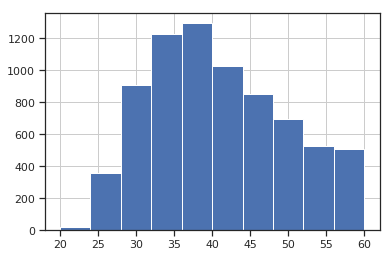

In [131]:
df['age'].hist()

In [132]:
df['y'].value_counts()


no     7205
yes     220
Name: y, dtype: int64

In [133]:
df['traget']=df['y'].astype('category')

In [134]:
df['traget'].replace('no',0,inplace=True)
df['traget'].replace('yes',1,inplace=True)


In [135]:
df['traget']=df['traget'].astype('bool')
df['traget'].value_counts()

False    7205
True      220
Name: traget, dtype: int64

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


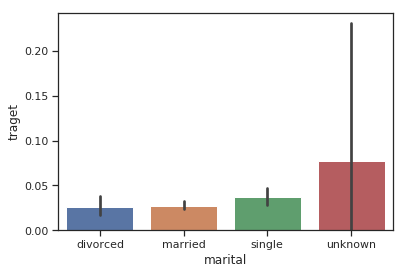

In [136]:
ax = sns.barplot(x="marital",y='traget',data=df)


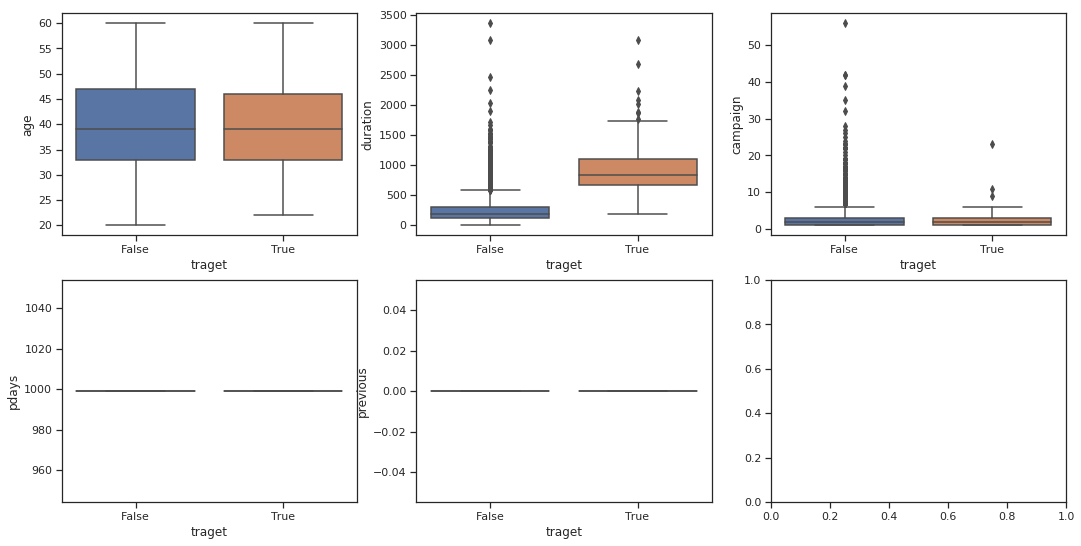

In [137]:
fig, axis = plt.subplots(2,3,figsize=(18,9))

sns.boxplot(x='traget', y='age', data=df,ax = axis[0,0])
sns.boxplot(x='traget', y='duration', data=df,ax = axis[0,1])
sns.boxplot(x='traget', y='campaign', data=df,ax = axis[0,2])
sns.boxplot(x='traget', y='pdays', data=df,ax = axis[1,0])
sns.boxplot(x='traget', y='previous', data=df,ax = axis[1,1])


In [138]:
df['pdays'].unique()

array([999])

In [139]:
df['previous'].unique()

array([0])

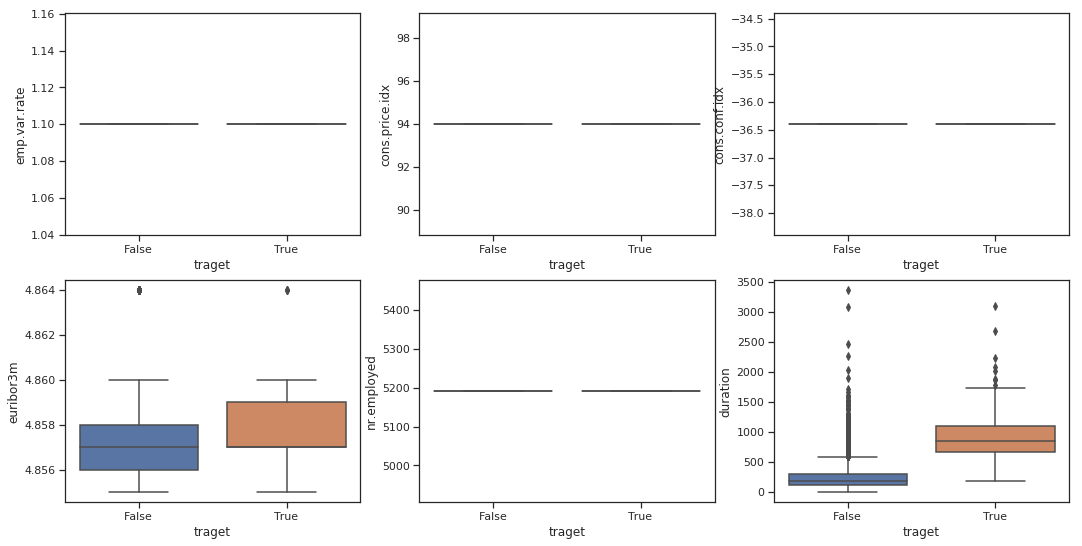

In [140]:
fig, axis = plt.subplots(2,3,figsize=(18,9))

sns.boxplot(x='traget', y='emp.var.rate', data=df,ax = axis[0,0])
sns.boxplot(x='traget', y='cons.price.idx', data=df,ax = axis[0,1])
sns.boxplot(x='traget', y='cons.conf.idx', data=df,ax = axis[0,2])
sns.boxplot(x='traget', y='euribor3m', data=df,ax = axis[1,0])
sns.boxplot(x='traget', y='nr.employed', data=df,ax = axis[1,1])
sns.boxplot(x='traget', y='duration', data=df,ax = axis[1,2])



In [141]:
print('employment variation rate - quarterly indicator',df['emp.var.rate'].unique())
print('consumer price index - monthly indicator',df['cons.price.idx'].unique())
print('consumer confidence index - monthly indicator',df['cons.conf.idx'].unique())
print('euribor 3 month rate - daily indicator',df['euribor3m'].unique())
print('number of employees - quarterly indicator',df['nr.employed'].unique())
# print('duration',df['duration'].unique())



employment variation rate - quarterly indicator [1.1]
consumer price index - monthly indicator [93.994]
consumer confidence index - monthly indicator [-36.4]
euribor 3 month rate - daily indicator [4.857 4.856 4.855 4.859 4.86  4.858 4.864]
number of employees - quarterly indicator [5191]


In [142]:
df_corr=df.corr()

In [143]:
df_corr['traget'].sort_values(ascending=False)

traget            1.000000e+00
duration          4.777817e-01
euribor3m         2.717037e-02
age               1.386787e-03
cons.price.idx    2.161456e-15
cons.conf.idx     6.701923e-16
emp.var.rate     -9.983759e-16
campaign         -1.424100e-02
pdays                      NaN
previous                   NaN
nr.employed                NaN
Name: traget, dtype: float64

### Note
**NaN->value don't change** 

In [144]:
df.describe(include='category')

,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,7425,7425,7425,7425,7425,7425,7425,7425,7425
unique,4,8,2,3,3,1,1,5,1
top,married,high.school,no,no,no,telephone,may,tue,nonexistent
freq,4966,1774,5066,3786,6126,7425,7425,1711,7425


job
admin.           20.511785
blue-collar      29.629630
entrepreneur      3.757576
housemaid         2.922559
management        7.191919
retired           2.855219
self-employed     3.205387
services         12.040404
student           0.888889
technician       13.521886
unemployed        2.208754
unknown           1.265993
dtype: float64


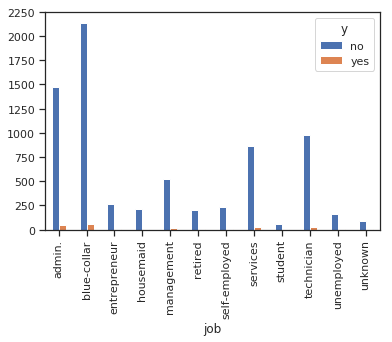

In [145]:
# fig, axis = plt.subplots(2,2,figsize=(20,20))
job = pd.crosstab(df['job'], df['y'])
job.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)


In [146]:
#replace unknown with mode 
mode_edu=df['job'].mode()
df['job']=df['job'].replace('unknown',mode_edu[0])
print(df.groupby(['job']).size()/len(df)*100)


job
admin.           20.511785
blue-collar      30.895623
entrepreneur      3.757576
housemaid         2.922559
management        7.191919
retired           2.855219
self-employed     3.205387
services         12.040404
student           0.888889
technician       13.521886
unemployed        2.208754
dtype: float64


marital
divorced    11.393939
married     66.882155
single      21.548822
unknown      0.175084
dtype: float64


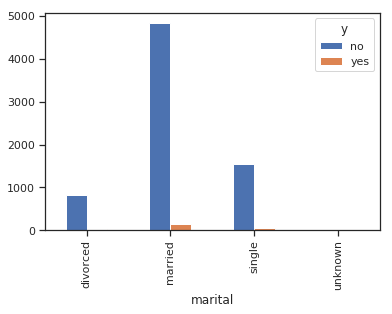

In [147]:
marital = pd.crosstab(df['marital'], df['y'])
marital.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)


In [148]:
#replace unknown with mode 
mode_edu=df['marital'].mode()
df['marital']=df['marital'].replace('unknown',mode_edu[0])
print(df.groupby(['marital']).size()/len(df)*100)


marital
divorced    11.393939
married     67.057239
single      21.548822
unknown      0.000000
dtype: float64


education
basic.4y               12.861953
basic.6y                7.690236
basic.9y               18.410774
high.school            23.892256
illiterate              0.026936
professional.course    11.313131
university.degree      21.090909
unknown                 4.713805
dtype: float64


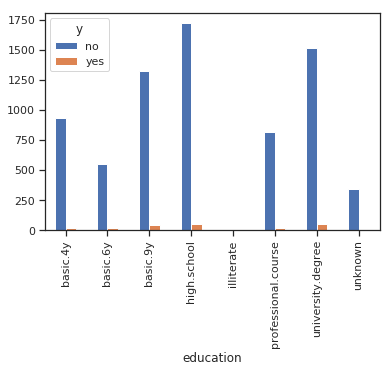

In [149]:
education = pd.crosstab(df['education'], df['y'])
education.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)


In [150]:
#replace unknown with mode 
mode_edu=df['education'].mode()
df['education']=df['education'].replace('unknown',mode_edu[0])
print(df.groupby(['education']).size()/len(df)*100)


education
basic.4y               12.861953
basic.6y                7.690236
basic.9y               18.410774
high.school            28.606061
illiterate              0.026936
professional.course    11.313131
university.degree      21.090909
unknown                 0.000000
dtype: float64


default
no         68.228956
unknown    31.771044
dtype: float64


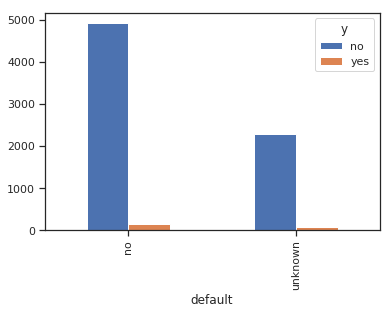

In [151]:
default = pd.crosstab(df['default'], df['y'])
default.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)


month
may    100.0
dtype: float64


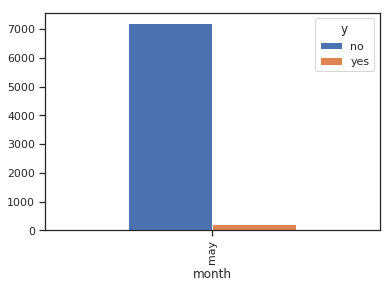

In [152]:
month = pd.crosstab(df['month'], df['y'])
month.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)


contact
telephone    100.0
dtype: float64


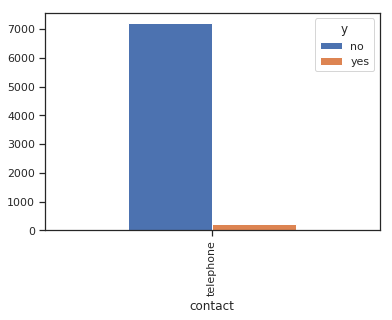

In [153]:
contact = pd.crosstab(df['contact'], df['y'])
contact.plot(kind='bar')
print(df.groupby(['contact']).size()/len(df)*100)


loan
no         82.505051
unknown     2.855219
yes        14.639731
dtype: float64


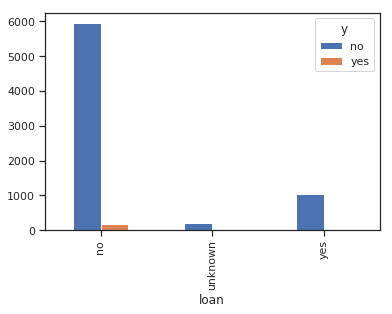

In [154]:
loan = pd.crosstab(df['loan'], df['y'])
loan.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)


In [155]:
#replace unknown with mode 
mode_edu=df['loan'].mode()
df['loan']=df['loan'].replace('unknown',mode_edu[0])
print(df.groupby(['loan']).size()/len(df)*100)


loan
no         85.360269
unknown     0.000000
yes        14.639731
dtype: float64


housing
no         50.989899
unknown     2.855219
yes        46.154882
dtype: float64


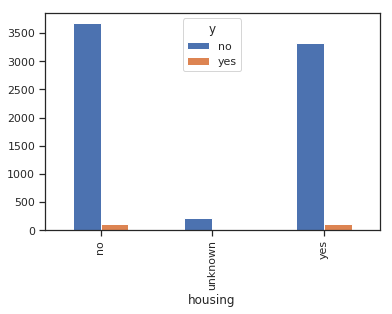

In [156]:
housing = pd.crosstab(df['housing'], df['y'])
housing.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)


In [157]:
#replace unknown with mode 
mode_edu=df['housing'].mode()
df['housing']=df['housing'].replace('unknown',mode_edu[0])
print(df.groupby(['housing']).size()/len(df)*100)


housing
no         53.845118
unknown     0.000000
yes        46.154882
dtype: float64


poutcome
nonexistent    100.0
dtype: float64


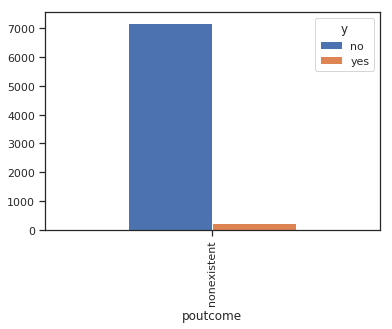

In [158]:
poutcome = pd.crosstab(df['poutcome'], df['y'])
poutcome.plot(kind='bar')
print(df.groupby(['poutcome']).size()/len(df)*100)


day_of_week
fri    17.818182
mon    18.478114
thu    17.750842
tue    23.043771
wed    22.909091
dtype: float64


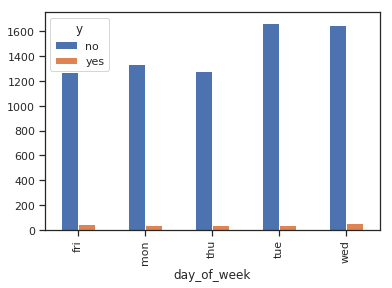

In [159]:
day_of_week = pd.crosstab(df['day_of_week'], df['y'])
day_of_week.plot(kind='bar')
print(df.groupby(['day_of_week']).size()/len(df)*100)


## ML

In [160]:
#import libs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [161]:
X=df.drop(['y','duration','traget'],axis=1) 

In [162]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191


In [163]:
X=pd.get_dummies(X)

In [164]:
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,loan_unknown,loan_yes,contact_telephone,month_may,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,0,0,1,1,0,1,0,0,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,0,0,1,1,0,1,0,0,0,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,0,0,1,1,0,1,0,0,0,1
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191,1,...,0,0,1,1,0,1,0,0,0,1
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191,0,...,0,1,1,1,0,1,0,0,0,1


In [165]:
#array normaliz
X = StandardScaler().fit_transform(X.values)
X

array([[ 1.76117339, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ],
       [ 1.87379008, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ],
       [-0.37854376, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ],
       ...,
       [-1.72994406, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ],
       [-1.61732736, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ],
       [-0.37854376, -0.5642498 ,  0.        , ..., -0.54721109,
        -0.54513284,  0.        ]])

In [166]:
df['traget_y']=df['traget']
df['traget_y'].replace(False,int(0),inplace=True)
df['traget_y'].replace(True,int(1),inplace=True)

In [167]:
df['traget_y'].unique()

array([0., 1.])

In [176]:
y =df['traget_y']
df=df.drop(['traget_y'],axis=1)

In [169]:
#array
y=y.values
y

array([0., 0., 0., ..., 0., 0., 0.])

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [171]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5940, 48)
(5940,)
(1485, 48)
(1485,)


In [172]:
#Knn when k =1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test, y_pred))
print('accuracy_train',metrics.accuracy_score(y_train, knn.predict(X_train)))


accuracy_test 0.9468013468013468
accuracy_train 0.9986531986531987


In [173]:
#knn when K=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
y_pred_5 = knn_5.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test, y_pred_5))
print('accuracy_train',metrics.accuracy_score(y_train, knn_5.predict(X_train)))


accuracy_test 0.9717171717171718
accuracy_train 0.97003367003367


In [174]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict the response values for the observations in X
pred_log=logreg.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test,pred_log))
print('accuracy_test',metrics.accuracy_score(y_train,logreg.predict(X_train)))

accuracy_test 0.9717171717171718
accuracy_test 0.97003367003367


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [175]:
clf_G=GaussianNB()
clf_G.fit(X_train,y_train)
pred_G=clf_G.predict(X_test)
print('accuracy_test',metrics.accuracy_score(y_test,pred_G))
print('accuracy_train',metrics.accuracy_score(y_train,clf_G.predict(X_train)))

accuracy_test 0.07205387205387205
accuracy_train 0.07356902356902358
